<html>
<body>
<h1 style = "color:blue"> Classify 10, 20 & 50 cent coins into two different categories</h1>

<h2 style = "color:red"> Abstract: </h2>
<p>The goal of this notebook is to build a convNN clasification using Tensor Flow library that is desinged to classify a given image of an euro coin into three different categories:.</p>
<p> a) Categorie 0 = 10 cents. </p>
<p> b) Categorie 1 = 20 cents. </p>
<p> c) Categorie 2 = 50 cents.

<h2 style = "color:red"> Dataset: </h2>
<p>The dataset employed in the training process is given by the Euro Coin dataset.</p>
</body>
</html>


In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from coins_utils import *

TRAIN_DIR = 'CandidateDataSet2/augmented_and_resized_brightness_RAW/50centVs20centVs10cent/'
#TRAIN_DIR = 'CandidateDataSet2/augmented_and_resized_RAW/50centVs20centVs10cent/'

images_full = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.jpg' in i]
random.shuffle(images_full)
n_images = len(images_full)
print("Number of images in full dataset "+str(n_images))
print("------------------------------------")


#Splitting of the input dataset into train, validation and test set.
train_to_full = 0.3 # Fraction of images used for training
validation_to_full = 0.8 # Fraction of images used for validation
train_to_full_index = int(n_images*train_to_full)
validation_to_full_index = int(n_images*validation_to_full)

#train_images = sorted(images_full[:train_to_full_index])
#validation_images =  sorted(images_full[train_to_full_index:validation_to_full_index])
#test_images =  sorted(images_full[validation_to_full_index:])

train_images = images_full[:train_to_full_index]
validation_images =  images_full[train_to_full_index:validation_to_full_index]
test_images =  images_full[validation_to_full_index:]

n_train_images = len(train_images)
n_validation_images = len(validation_images)
n_test_images = len(test_images)

print("Total number of train images "+str(n_train_images))
print("Total number of validation images "+str(n_validation_images))
print("Total number of test images "+str(n_test_images))
if n_train_images+n_validation_images+n_test_images - n_images != 0:
    print("Warning, there is a problem in the splitting of images")

train = prep_data(train_images)
validation = prep_data(validation_images)
test = prep_data(test_images)

#To make them easier to operate in future
train_images_name = [i.split('/')[-1] for i in train_images]
validation_images_name = [i.split('/')[-1] for i in validation_images]
test_images_name = [i.split('/')[-1] for i in test_images]
print(len(train_images_name), len(validation_images_name), len(test_images_name))

Using TensorFlow backend.


Number of images in full dataset 45240
------------------------------------
Total number of train images 13572
Total number of validation images 22620
Total number of test images 9048
Processed 0 of 13572
Processed 1000 of 13572
Processed 2000 of 13572
Processed 3000 of 13572
Processed 4000 of 13572
Processed 5000 of 13572
Processed 6000 of 13572
Processed 7000 of 13572
Processed 8000 of 13572
Processed 9000 of 13572
Processed 10000 of 13572
Processed 11000 of 13572
Processed 12000 of 13572
Processed 13000 of 13572
Processed 0 of 22620
Processed 1000 of 22620
Processed 2000 of 22620
Processed 3000 of 22620
Processed 4000 of 22620
Processed 5000 of 22620
Processed 6000 of 22620
Processed 7000 of 22620
Processed 8000 of 22620
Processed 9000 of 22620
Processed 10000 of 22620
Processed 11000 of 22620
Processed 12000 of 22620
Processed 13000 of 22620
Processed 14000 of 22620
Processed 15000 of 22620
Processed 16000 of 22620
Processed 17000 of 22620
Processed 18000 of 22620
Processed 19000 o

# Getting the LABELS

In [2]:
## read the labels.
labels = pd.read_csv(TRAIN_DIR+'/labels_50centVs20centVs10cent.csv')

labels_train_df = labels[labels["FileName"].isin(train_images_name)]
labels_validation_df = labels[labels["FileName"].isin(validation_images_name)]
labels_test_df = labels[labels["FileName"].isin(test_images_name)]


#Example get the CoinType field and create array with labels (This is not very efficient...)
#iloc is there because for some reason it won't give me values with 'CoinType'.
nb_classes = 3
labels_train_nocategorical = []
for kitem in train_images_name:
        labels_train_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][3])   
labels_train_nocategorical= np.array(labels_train_nocategorical)
    
labels_validation_nocategorical = []
for kitem in validation_images_name:
        labels_validation_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][3]) 
labels_validation_nocategorical= np.array(labels_validation_nocategorical)


labels_test_nocategorical = []
for kitem in test_images_name:
        labels_test_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][3])     
labels_test_nocategorical= np.array(labels_test_nocategorical)


#Convert to categorical labels (vectors)
from keras.utils import np_utils
labels_train = np_utils.to_categorical(labels_train_nocategorical, nb_classes)
labels_validation = np_utils.to_categorical(labels_validation_nocategorical, nb_classes)
labels_test = np_utils.to_categorical(labels_test_nocategorical, nb_classes)

# Sanity check, we are reading everything properly

P70210-172758_Candidate_7_Aug_100_270_Brightness_50.jpg
This is 20 cent
(100, 100, 3)


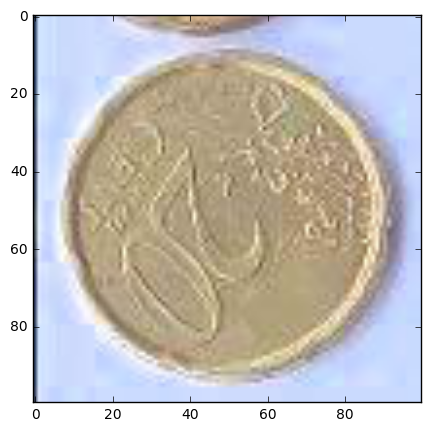

P70210-170138_Candidate_13_Aug_100_0_Brightness_0.jpg
This is 50 cent
(100, 100, 3)


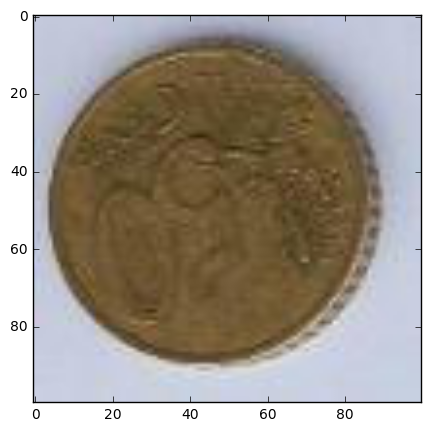

P70210-170101_Candidate_4_Aug_100_270_Brightness_50.jpg
This is 50 cent
(100, 100, 3)


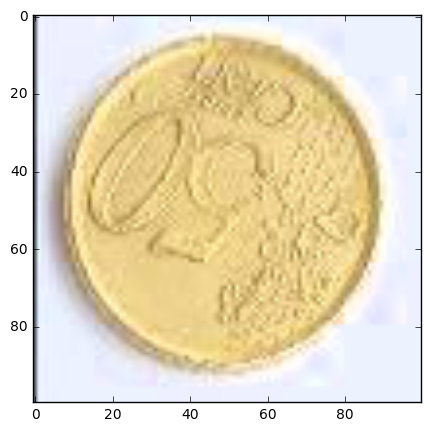

P70210-173422_Candidate_10_Aug_100_0_Brightness_100.jpg
This is 20 cent
(100, 100, 3)


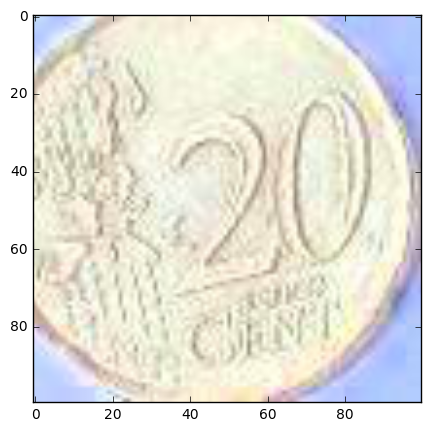

P70210-170207_Candidate_5_Aug_100_0_Brightness_50.jpg
This is 50 cent
(100, 100, 3)


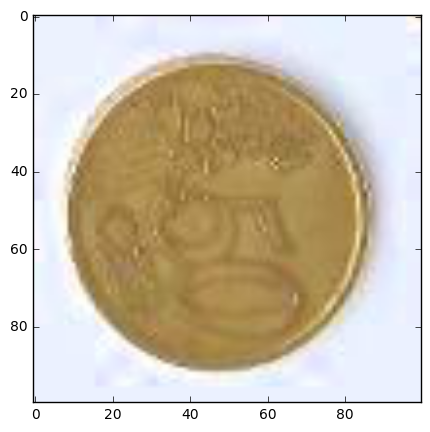

P70210-165637_Candidate_21_Aug_100_0_Brightness_-50.jpg
This is 50 cent
(100, 100, 3)


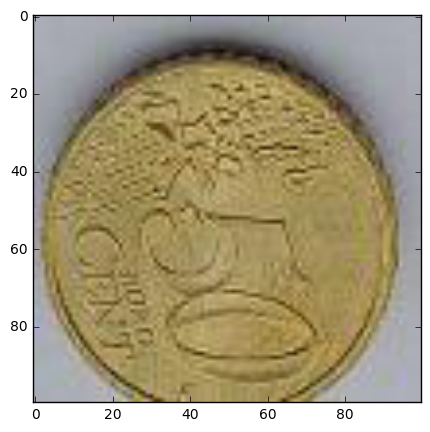

P70210-173551_Candidate_6_Aug_100_90_Brightness_-50.jpg
This is 20 cent
(100, 100, 3)


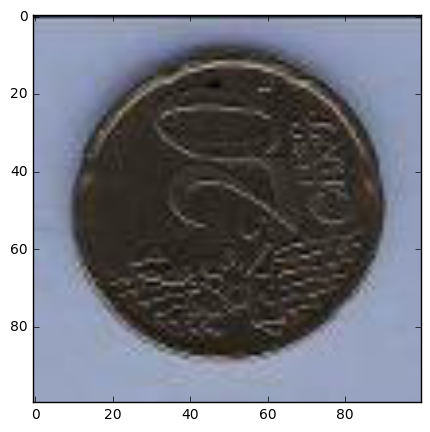

P70210-170459_Candidate_5_Aug_100_0_Brightness_-100.jpg
This is 50 cent
(100, 100, 3)


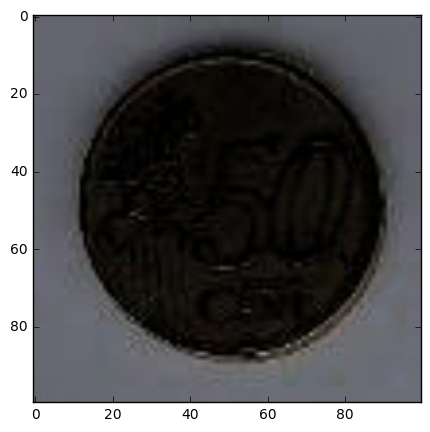

P70210-170459_Candidate_24_Aug_100_180_Brightness_50.jpg
This is 50 cent
(100, 100, 3)


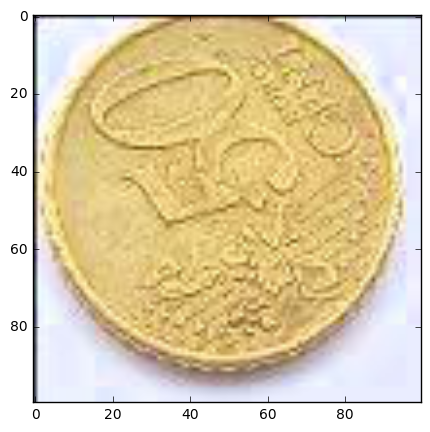

P70210-173043_Candidate_17_Aug_100_0_Brightness_0.jpg
This is 20 cent
(100, 100, 3)


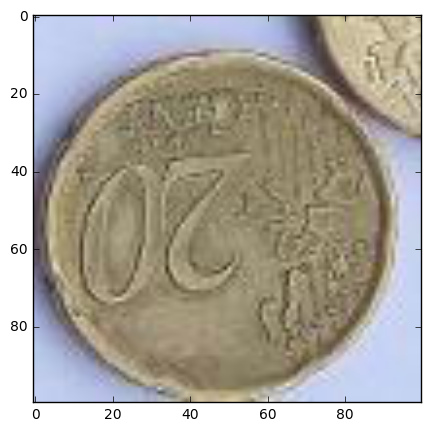

P70216-134151_Candidate_13_Aug_100_0_Brightness_50.jpg
This is 10 cent
(100, 100, 3)


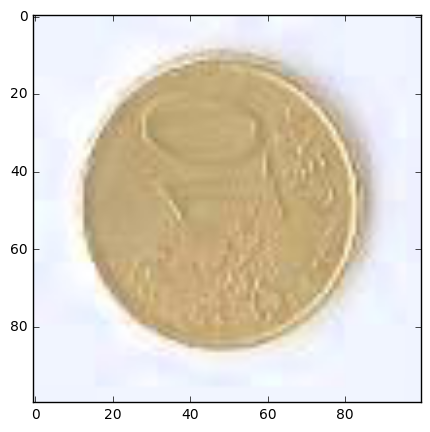

P70216-133950_Candidate_23_Aug_100_180_Brightness_0.jpg
This is 10 cent
(100, 100, 3)


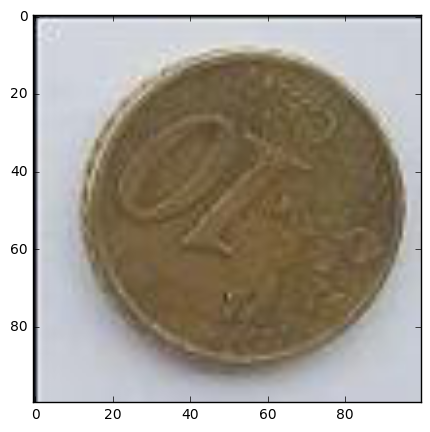

P70216-133746_Candidate_17_Aug_100_180_Brightness_-50.jpg
This is 10 cent
(100, 100, 3)


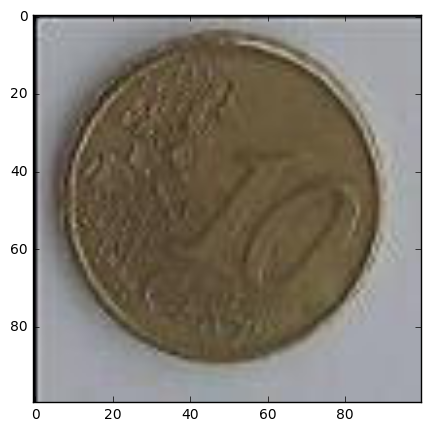

P70210-173638_Candidate_4_Aug_100_270_Brightness_0.jpg
This is 20 cent
(100, 100, 3)


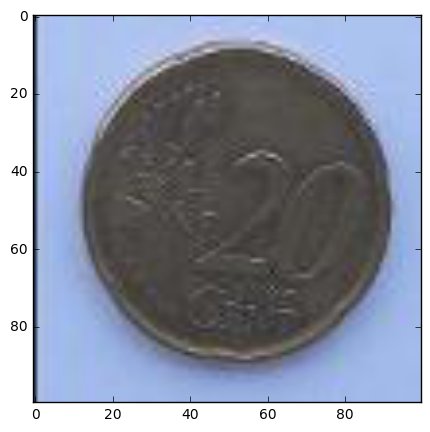

P70210-173155_Candidate_22_Aug_100_90_Brightness_50.jpg
This is 20 cent
(100, 100, 3)


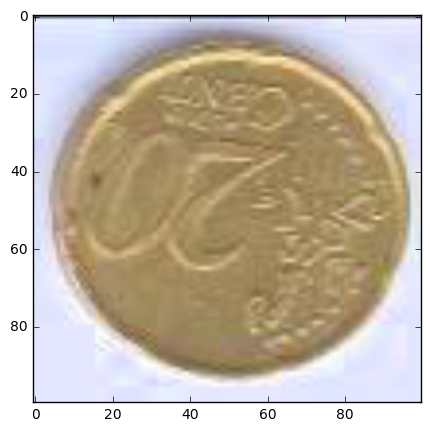

P70210-165415_Candidate_20_Aug_100_0_Brightness_100.jpg
This is 50 cent
(100, 100, 3)


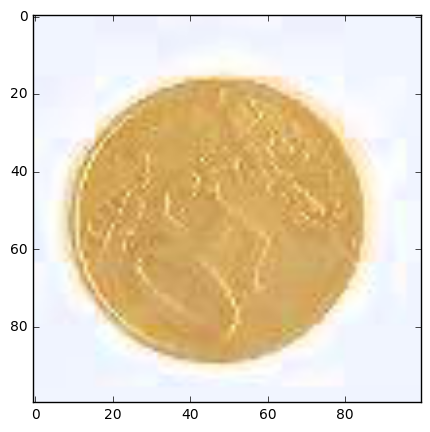

P70210-165415_Candidate_20_Aug_100_0_Brightness_-100.jpg
This is 50 cent
(100, 100, 3)


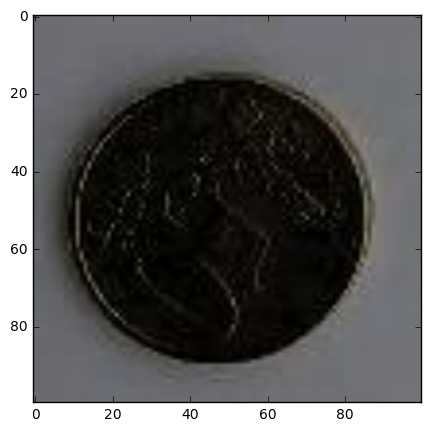

P70210-170336_Candidate_6_Aug_100_0_Brightness_-100.jpg
This is 50 cent
(100, 100, 3)


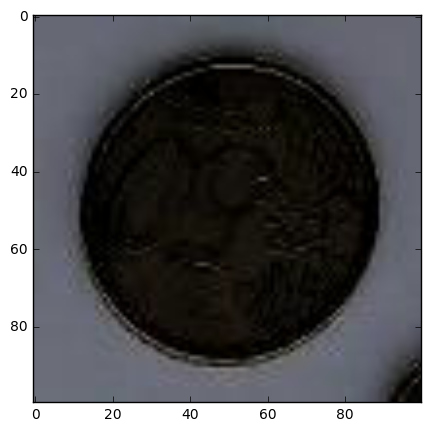

P70216-134049_Candidate_6_Aug_100_270_Brightness_50.jpg
This is 10 cent
(100, 100, 3)


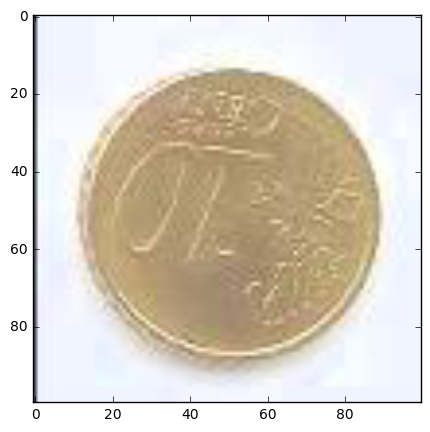

P70216-133950_Candidate_6_Aug_100_0_Brightness_-50.jpg
This is 10 cent
(100, 100, 3)


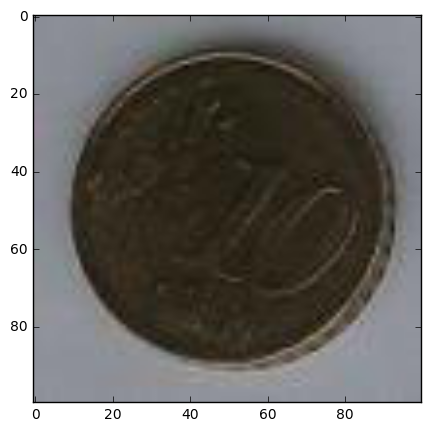

P70210-170459_Candidate_23_Aug_100_0_Brightness_100.jpg
This is 50 cent
(100, 100, 3)


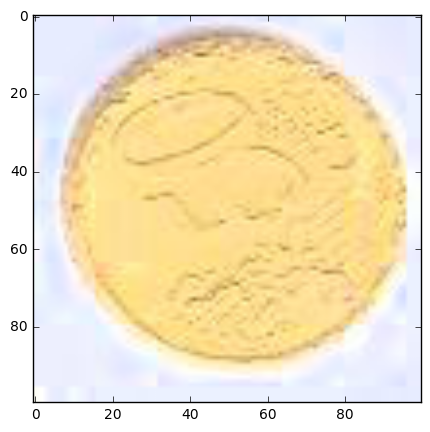

P70210-165637_Candidate_1_Aug_100_270_Brightness_-50.jpg
This is 50 cent
(100, 100, 3)


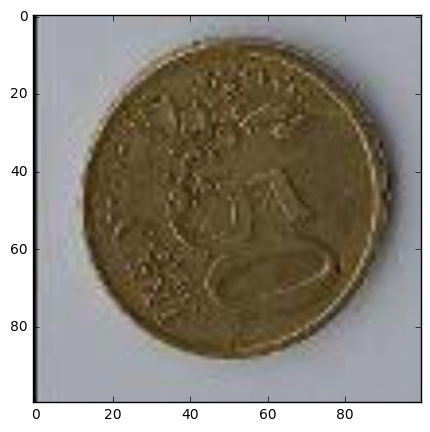

P70210-165920_Candidate_3_Aug_100_270_Brightness_100.jpg
This is 50 cent
(100, 100, 3)


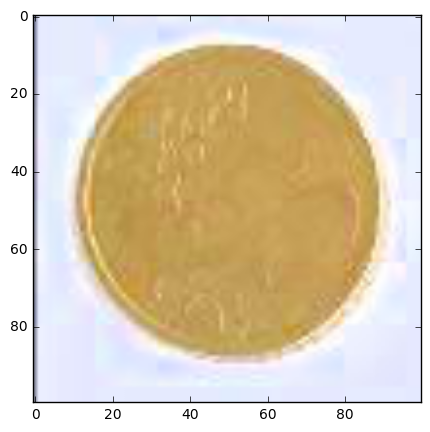

P70210-165611_Candidate_1_Aug_100_90_Brightness_0.jpg
This is 50 cent
(100, 100, 3)


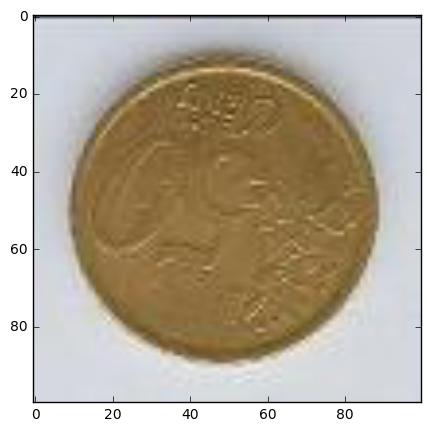

P70210-165920_Candidate_21_Aug_100_90_Brightness_-50.jpg
This is 50 cent
(100, 100, 3)


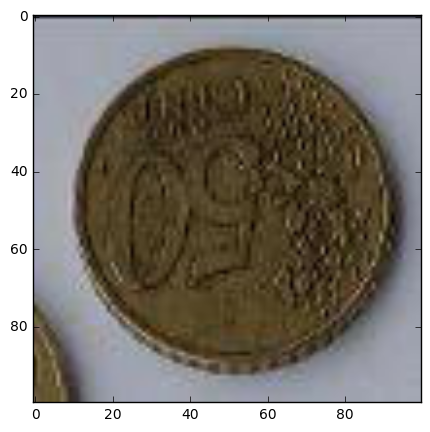

P70210-173538_Candidate_20_Aug_100_180_Brightness_100.jpg
This is 20 cent
(100, 100, 3)


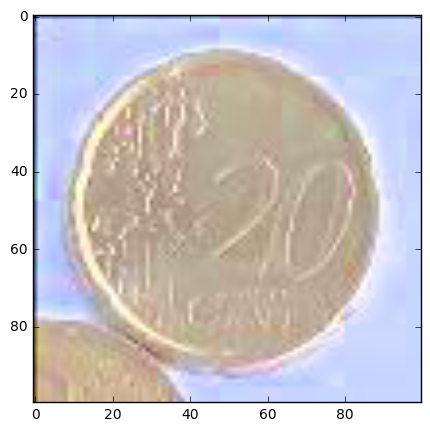

P70210-173031_Candidate_18_Aug_100_0_Brightness_-50.jpg
This is 20 cent
(100, 100, 3)


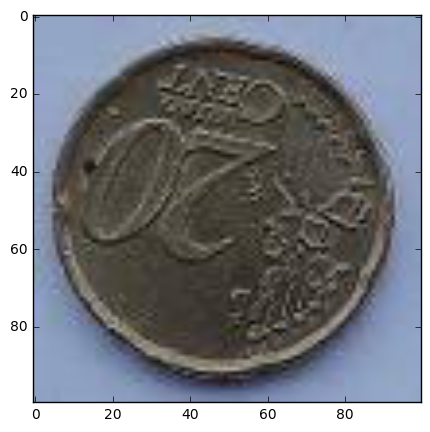

P70216-134218_Candidate_17_Aug_100_0_Brightness_50.jpg
This is 10 cent
(100, 100, 3)


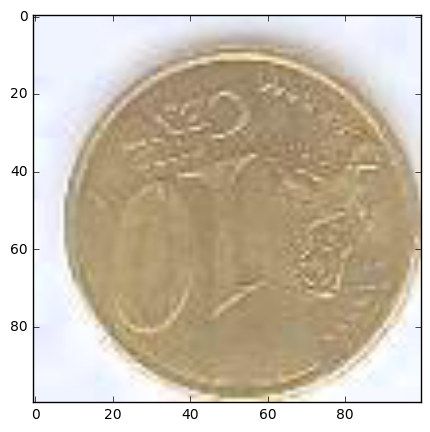

P70210-172941_Candidate_5_Aug_100_90_Brightness_-100.jpg
This is 20 cent
(100, 100, 3)


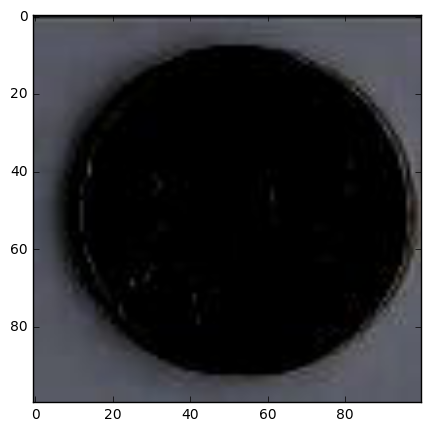

P70210-170336_Candidate_14_Aug_100_270_Brightness_100.jpg
This is 50 cent
(100, 100, 3)


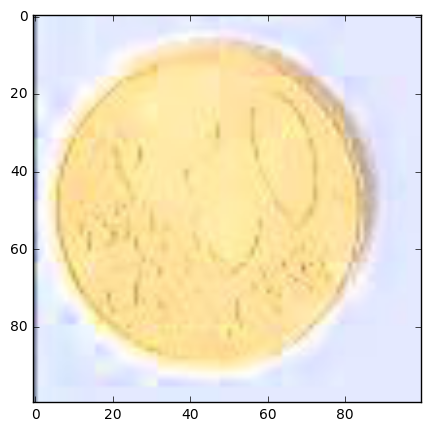

In [3]:
#Print some coins
def printSomeCoints(img, train_images_name, labels, ncoins):
    for i in range(0,ncoins):
        print(train_images_name[i])
        if labels[i] == 0.:
            print("This is 10 cent")
        if labels[i] == 1.:
            print("This is 20 cent")
        if labels[i] == 2.:
            print("This is 50 cent")
        plt.figure(figsize=(10,5))
        print(train[i].shape)
        plt.imshow(train[i])
        plt.show()
    
    
printSomeCoints(train, train_images_name, labels_train_nocategorical, 30)

<html>
<body>
<h2 style = "color:red"> Building the classificator (work in progress..): </h2>
<p> Use the training dataset to build the classificator using a ConvNN.</p>
</body>
</html>

In [4]:
#Loading keras deep learnig libraries to build the model: https://keras.io/ 
from keras.layers import Input, Dense, Flatten, Dropout, Activation, advanced_activations, Convolution2D, MaxPooling2D
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import initializations

## Standard Architecture

In [ ]:
#Model hyperparameters
batch_size = 32 # in each iteration, we consider batch_size training examples at once
num_epochs = 15 # we iterate num_epochs times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 62 # ...switching to 64 after the first pooling layer
conv_depth_3 = 128 # ...switching to 64 after the first pooling layer
conv_depth_4 = 256 # ...switching to 64 after the first pooling layer
conv_depth_5 = 512 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with this probability 
drop_prob_2 = 0.5 # dropout in the FC layer with this probability 
hidden_size = 64 # the FC layer will this neurons
data_augmentation = False # Whether to use or not data augmentation

ROWS = 100
COLS = 100
CHANNELS = 3

NN = False
ConvNN = True
if ConvNN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='tanh')(inp)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
    conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_2)
    #pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_3)
    #conv_4 = Convolution2D(conv_depth_4, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_3)
    #pool_4 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    #conv_5 = Convolution2D(conv_depth_5, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_4)
                       

    flat = Flatten()(conv_3)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

if NN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!                  
    flat = Flatten()(inp)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

    
#print the summary of the architecture
model.summary()

#Visulize the model if desired
#from keras.utils.visualize_util import plot
#plot(model, to_file='Example_of_CNN_CatsVsDogs.pdf')

# reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')


# Let's train the model using SGD
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

# Let's train the SGD model WITHOUT using data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train, labels_train, batch_size=batch_size, nb_epoch=num_epochs, validation_data=(validation, labels_validation), shuffle=True, callbacks=[reduce_lr,early_stopping])
    


## Reduced (And deeper) architecture

In [6]:
#Model hyperparameters
batch_size = 32 # in each iteration, we consider batch_size training examples at once
num_epochs = 100 # we iterate num_epochs times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 8
conv_depth_2 = 16
conv_depth_3 = 32
conv_depth_4 = 64
conv_depth_5 = 64
conv_depth_6 = 64
conv_depth_7 = 128
conv_depth_8 = 128
#conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
#conv_depth_2 = 62 # ...switching to 64 after the first pooling layer
#conv_depth_3 = 128 # ...switching to 64 after the first pooling layer
#conv_depth_4 = 256 # ...switching to 64 after the first pooling layer
#conv_depth_5 = 512 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with this probability 
drop_prob_2 = 0.5 # dropout in the FC layer with this probability 
hidden_size = 24 # the FC layer will this neurons
data_augmentation = False # Whether to use or not data augmentation

ROWS = 100
COLS = 100
CHANNELS = 3

NN = False
ConvNN = True
if ConvNN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='tanh')(inp)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
    conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    pool_2_d = Dropout(drop_prob_1)(pool_2)
    conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_2_d)
    pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_3)
    pool_3_d = Dropout(drop_prob_1)(pool_3)
    conv_4 = Convolution2D(conv_depth_4, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_3_d)
    #pool_4 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    conv_5 = Convolution2D(conv_depth_5, kernel_size, kernel_size, border_mode='same', activation='tanh')(conv_4)
    #pool_5 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_5)
    conv_6 = Convolution2D(conv_depth_6, kernel_size, kernel_size, border_mode='same', activation='tanh')(conv_5)
    #pool_6 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_6)
    conv_7 = Convolution2D(conv_depth_7, kernel_size, kernel_size, border_mode='same', activation='tanh')(conv_6)
    #pool_7 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_7)
    #pool_7_d = Dropout(drop_prob_1)(pool_7)
    conv_8 = Convolution2D(conv_depth_8, kernel_size, kernel_size, border_mode='same', activation='tanh')(conv_7)
                       

    flat = Flatten()(conv_8)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    hidden_d = Dropout(drop_prob_2)(hidden)
    out = Dense(nb_classes, activation='sigmoid')(hidden_d)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

if NN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!                  
    flat = Flatten()(inp)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

    
#print the summary of the architecture
model.summary()

#Visulize the model if desired
#from keras.utils.visualize_util import plot
#plot(model, to_file='Example_of_CNN_CatsVsDogs.pdf')

# reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='auto')


# Let's train the model using SGD
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

# Let's train the SGD model WITHOUT using data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train, labels_train, batch_size=batch_size, nb_epoch=num_epochs, validation_data=(validation, labels_validation), shuffle=True, callbacks=[reduce_lr,early_stopping])
                       
                       

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 100, 100, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 100, 100, 8)   224         input_2[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 50, 50, 8)     0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 50, 50, 16)    1168        maxpooling2d_4[0][0]             
___________________________________________________________________________________________

# Learning curves (check the performance)

dict_keys(['val_loss', 'lr', 'loss', 'val_acc', 'acc'])


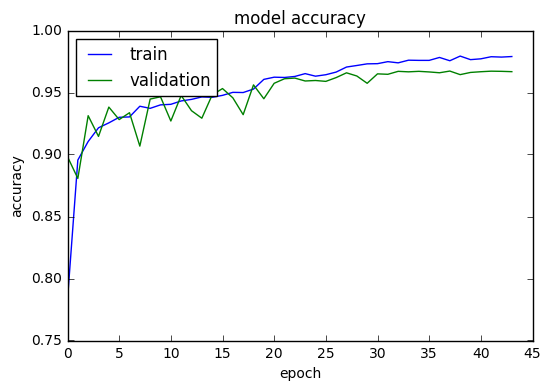

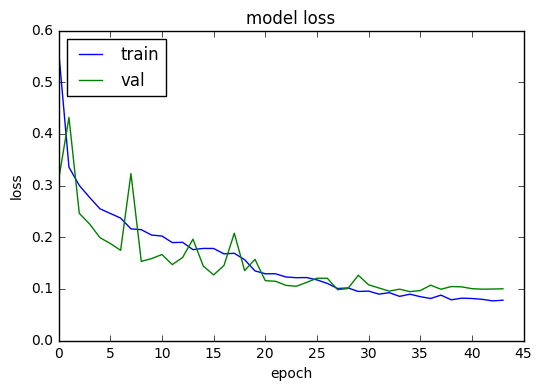

In [7]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Accuracy_Example_Coin_Classifier_GoldenCoins.pdf')
plt.close()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('Loss_Example_Coin_Classifier_GoldenCoins.pdf')
plt.close()

# Save 

In [8]:
#SaveModel(model, "Model_Example_Coin_Classifier_GoldenCoins") #For the standard architecture
#SaveModel(model, "Model_Example_Coin_Classifier_GoldenCoins_Reduced") #For the reduced architecture
SaveModel(model, "Model_Example_Coin_Classifier_GoldenCoins_Deep_30p_dropout025") #For the reduced deeper architecture

Saved model Model_Example_Coin_Classifier_GoldenCoins_Deep_30p_dropout025 to disk


0

# Load and Test model

In [ ]:
#Useful to test.
LoadAndTest = True
nTest = 45
if LoadAndTest == True:
    #loaded_model=LoadModel("Model_Example_Coin_Classifier_GoldenCoins") #For the standard architecture
    #loaded_model=LoadModel("Model_Example_Coin_Classifier_GoldenCoins_Reduced") #For the reduced architecture
    loaded_model=LoadModel("Model_Example_Coin_Classifier_GoldenCoins_Deep_30p_dropout025") #For the reduced deeper architecture
    # evaluate loaded model on test data
    loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
    
    #score_train = loaded_model.evaluate(train, labels_train, verbose=0)
    #score_validation = loaded_model.evaluate(validation, labels_validation, verbose=0)
    #print "Training %s: %.2f%%" % (loaded_model.metrics_names[1], score_train[1]*100)
    #print "Validation %s: %.2f%%" % (loaded_model.metrics_names[1], score_validation[1]*100)    
    
    print("PREDICTIONS \n")
    reduced_test = test[:nTest]
    predictedLabel = loaded_model.predict(reduced_test)

    for i in range(0,nTest):
        print(" %.8f of 10 cents \n" % predictedLabel[i,0])
        print(" %.8f of 20 cents \n" % predictedLabel[i,1])
        print(" %.8f of 50 cents \n" % predictedLabel[i,2])

        plt.imshow(reduced_test[i])
        plt.show()
    
        
    

## Testing with mixed coins images

Loaded model Model_Example_Coin_Classifier_GoldenCoins_Deep_30p_dropout025 from disk 

PREDICTIONS 

 0.84195685 of 10 cent 

 0.00038261 of 20 cent 

 0.46674308 of 50 cent 

[[  8.41956854e-01   3.82610015e-04   4.66743082e-01]]


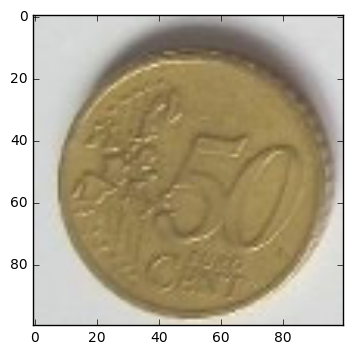

 0.07850843 of 10 cent 

 0.00053634 of 20 cent 

 0.76338750 of 50 cent 

[[  7.85084292e-02   5.36343083e-04   7.63387501e-01]]


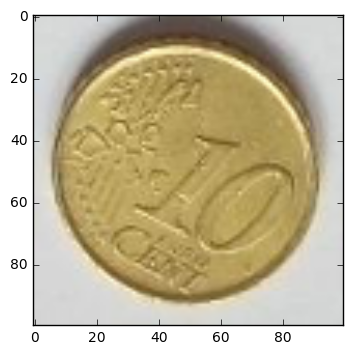

 0.00105498 of 10 cent 

 0.00109820 of 20 cent 

 0.89904165 of 50 cent 

[[ 0.00105498  0.0010982   0.89904165]]


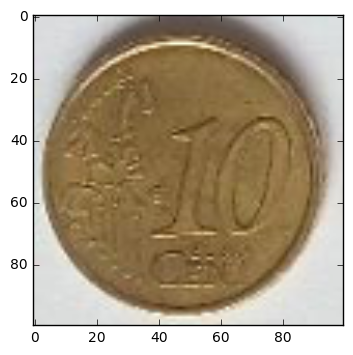

 0.00097037 of 10 cent 

 0.00112869 of 20 cent 

 0.90384626 of 50 cent 

[[ 0.00097037  0.00112869  0.90384626]]


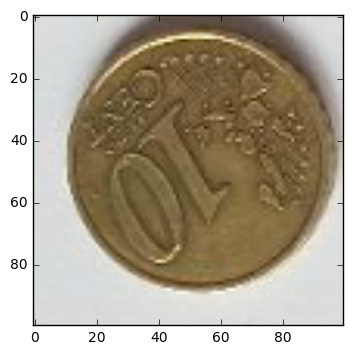

 0.95704508 of 10 cent 

 0.00029988 of 20 cent 

 0.29168043 of 50 cent 

[[  9.57045078e-01   2.99880136e-04   2.91680425e-01]]


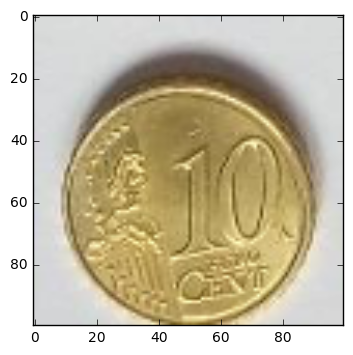

 0.00209757 of 10 cent 

 0.00098622 of 20 cent 

 0.89240122 of 50 cent 

[[ 0.00209757  0.00098622  0.89240122]]


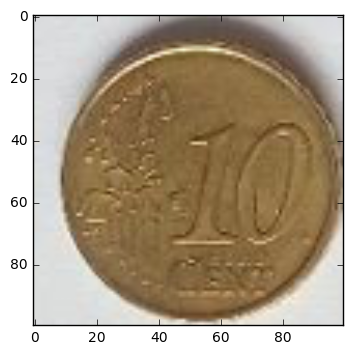

 0.08774060 of 10 cent 

 0.00046393 of 20 cent 

 0.81415343 of 50 cent 

[[  8.77406001e-02   4.63925069e-04   8.14153433e-01]]


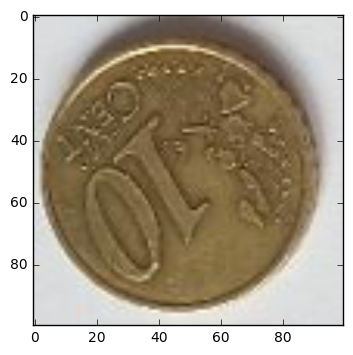

 0.00082846 of 10 cent 

 0.00122043 of 20 cent 

 0.89169270 of 50 cent 

[[  8.28463060e-04   1.22043071e-03   8.91692698e-01]]


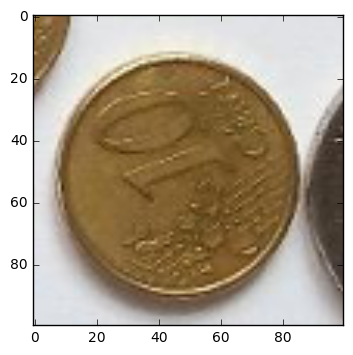

 0.00082143 of 10 cent 

 0.00127427 of 20 cent 

 0.89467484 of 50 cent 

[[  8.21431167e-04   1.27427280e-03   8.94674838e-01]]


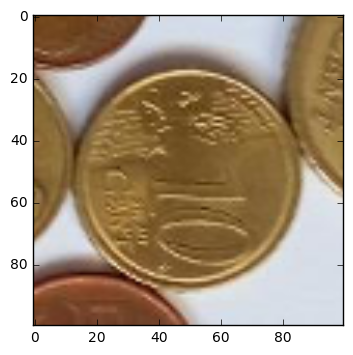

 0.00080573 of 10 cent 

 0.00119620 of 20 cent 

 0.89842415 of 50 cent 

[[  8.05733434e-04   1.19620119e-03   8.98424149e-01]]


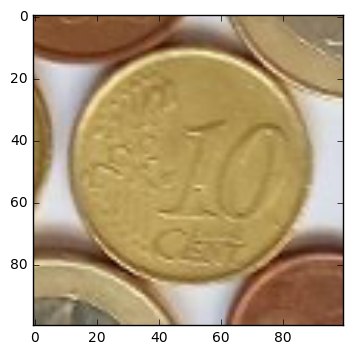

 0.00922574 of 10 cent 

 0.76507580 of 20 cent 

 0.07762571 of 50 cent 

[[ 0.00922574  0.7650758   0.07762571]]


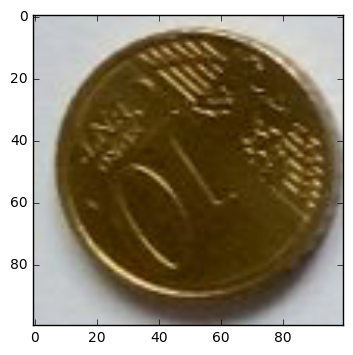

 0.00085145 of 10 cent 

 0.00128021 of 20 cent 

 0.87853074 of 50 cent 

[[  8.51449498e-04   1.28021359e-03   8.78530741e-01]]


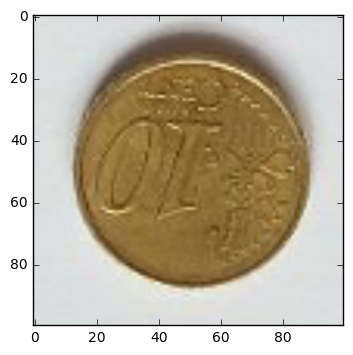

 0.97801799 of 10 cent 

 0.00069526 of 20 cent 

 0.00493413 of 50 cent 

[[  9.78017986e-01   6.95255585e-04   4.93412791e-03]]


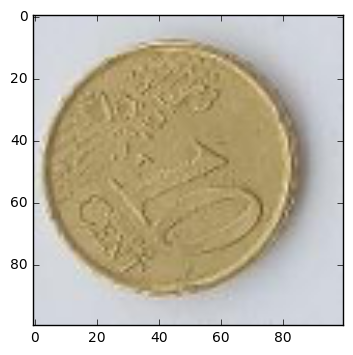

 0.97717935 of 10 cent 

 0.00059609 of 20 cent 

 0.01096772 of 50 cent 

[[  9.77179348e-01   5.96089580e-04   1.09677156e-02]]


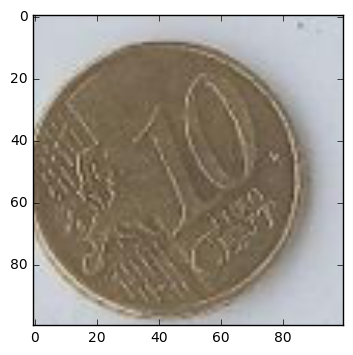

 0.97940993 of 10 cent 

 0.00073741 of 20 cent 

 0.00474123 of 50 cent 

[[  9.79409933e-01   7.37410679e-04   4.74122912e-03]]


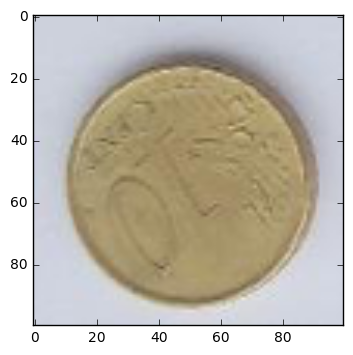

 0.97897846 of 10 cent 

 0.00075225 of 20 cent 

 0.00443658 of 50 cent 

[[  9.78978455e-01   7.52253749e-04   4.43658000e-03]]


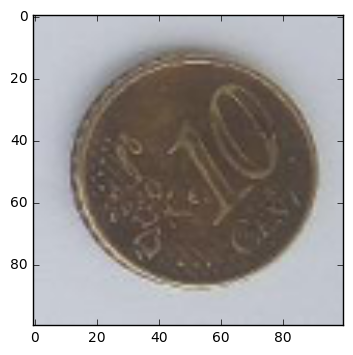

 0.97890168 of 10 cent 

 0.00072075 of 20 cent 

 0.00445317 of 50 cent 

[[  9.78901684e-01   7.20747747e-04   4.45317151e-03]]


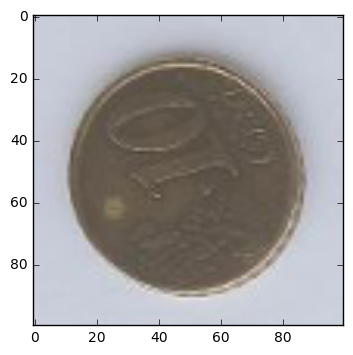

In [9]:
#Useful to test.
TEST_DIR = 'CandidateDataSet2/Processed_RAW/mix/'
VAL_DIR = 'CandidateDataSet2/Processed_RAW/10cent/'
#input_file = glob.glob(TEST_DIR+"*.jpg") #Try new Samples
input_file = [TEST_DIR+"P70216-160609_Candidate_6.jpg"]  #For debugging
print("--- 10 cents ---")
input_file.append(TEST_DIR+"P70216-160642_Candidate_10.jpg")
input_file.append(TEST_DIR+"P70216-160642_Candidate_20.jpg")
input_file.append(TEST_DIR+"P70216-160642_Candidate_21.jpg")
input_file.append(TEST_DIR+"P70216-160652_Candidate_27.jpg")
input_file.append(TEST_DIR+"P70216-160652_Candidate_25.jpg")
input_file.append(TEST_DIR+"P70216-160652_Candidate_26.jpg")
input_file.append(TEST_DIR+"P70216-160813_Candidate_37.jpg")
input_file.append(TEST_DIR+"P70216-161849_Candidate_4.jpg")
input_file.append(TEST_DIR+"P70216-161849_Candidate_18.jpg")
input_file.append(TEST_DIR+"P70216-161000_Candidate_34.jpg")
input_file.append(TEST_DIR+"P70216-160854_Candidate_38.jpg")
print("--- 10 cents : VALIDATION SET ---")
input_file.append(VAL_DIR+"P70216-134319_Candidate_14.jpg")
input_file.append(VAL_DIR+"P70216-134504_Candidate_21.jpg")
input_file.append(VAL_DIR+"P70216-134748_Candidate_5.jpg")
input_file.append(VAL_DIR+"P70216-134440_Candidate_9.jpg")
input_file.append(VAL_DIR+"P70216-134748_Candidate_9.jpg")
LoadAndTest = True
if LoadAndTest == True:
    #loaded_model=LoadModel("Model_Example_Coin_Classifier_GoldenCoins") #For the standard architecture
    loaded_model=LoadModel("Model_Example_Coin_Classifier_GoldenCoins_Deep_30p_dropout025") #For the reduced architecture
    # evaluate loaded model on test data
    #loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
    print("PREDICTIONS \n")
    for kfile in input_file:
        im = Image.open(kfile)
        imarray = np.array(im)
        imgResizedTest = cv2.resize(imarray, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
        imgResizedTest = [imgResizedTest for i in range(0,1)]
        imgResizedTest = np.array(imgResizedTest)
        predictedLabel = loaded_model.predict(imgResizedTest)
        print(" %.8f of 10 cent \n" % predictedLabel[0,0])
        print(" %.8f of 20 cent \n" % predictedLabel[0,1])
        print(" %.8f of 50 cent \n" % predictedLabel[0,2])
        print(predictedLabel)
        plt.imshow(Image.fromarray(imgResizedTest[0],'RGB'))
        plt.show()